In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
import joblib

In [14]:
df = pd.read_csv(r"C:\Users\rahul\Desktop\projects\AmesHousing.csv")

In [15]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [16]:
print(df.describe())


            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

In [17]:
print(df.isnull().sum())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


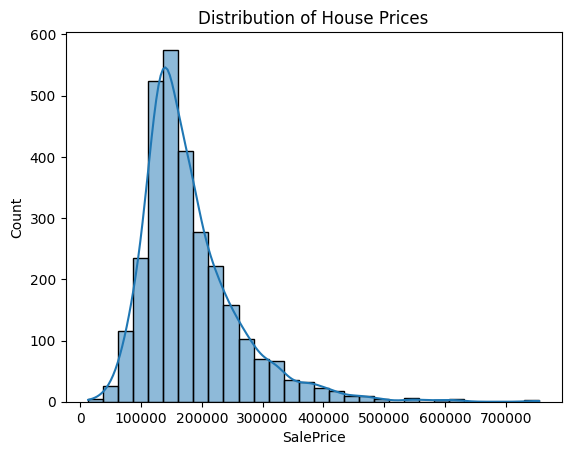

In [18]:
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.show()

In [20]:
numerical_features = ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Garage Cars']
categorical_features = ['Neighborhood', 'House Style', 'Exterior 1st']

X = df[numerical_features + categorical_features]
y = df['SalePrice']


In [33]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer([
    ('num', num_imputer, numerical_features),
    ('cat', cat_imputer, categorical_features)
], remainder='passthrough')


In [34]:
# Preprocessing pipeline
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])


In [35]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with preprocessing and model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Lot Area', 'Overall Qual',
                                                   'Overall Cond', 'Year Built',
                                                   'Gr Liv Area', 'Full Bath',
                                                   'Half Bath',
                                                   'Garage Cars']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood',
                                                   'House Style',
                                                   'Exterior 1st'])])),
                ('regressor', LinearRegression())])

In [36]:
### Step 6: Model Evaluation
y_pred = model_pipeline.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 21478.234702903537


In [37]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


Mean Squared Error (MSE): 1290090094.6045346


In [38]:
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))


Root Mean Squared Error (RMSE): 35917.82419084617


In [39]:
print("R-squared Score (R2):", r2_score(y_test, y_pred))


R-squared Score (R2): 0.8390916891645612


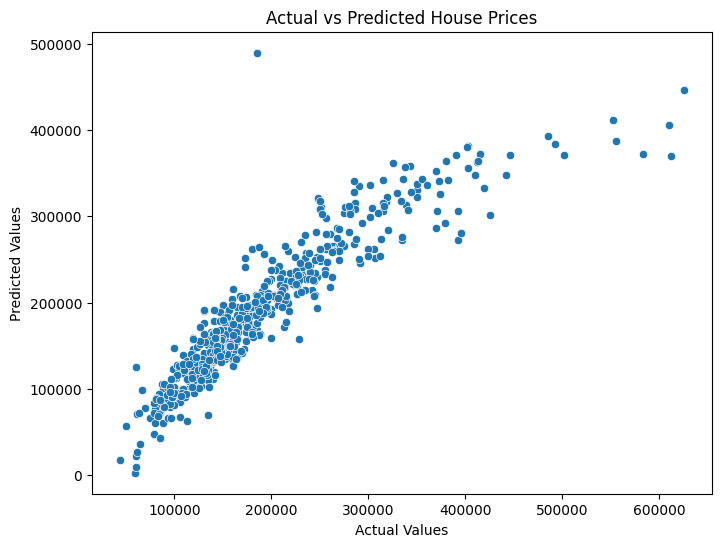

In [40]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [42]:
joblib.dump(model_pipeline, "house_price_model.pkl")

['house_price_model.pkl']